<a href="https://colab.research.google.com/github/Anya-Gupta-05/Fraud_Detection_NN/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
file_path="/content/drive/MyDrive/fraud_detction dataset.csv"
df=pd.read_csv(file_path)
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2/20/2024 5:58,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2/25/2024 8:09,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,3/18/2024 3:42,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,3/16/2024 20:41,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,1/15/2024 5:08,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


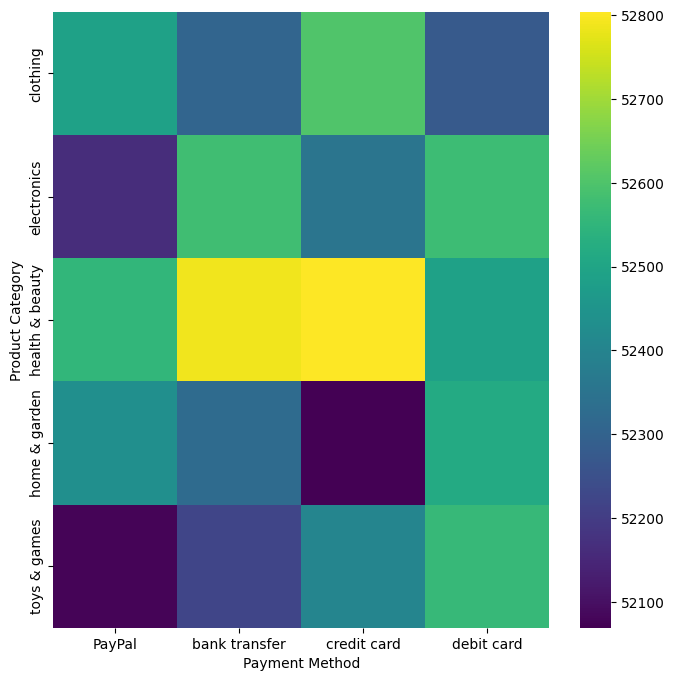

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Product Category'].value_counts()
    for x_label, grp in df.groupby('Payment Method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Payment Method')
_ = plt.ylabel('Product Category')

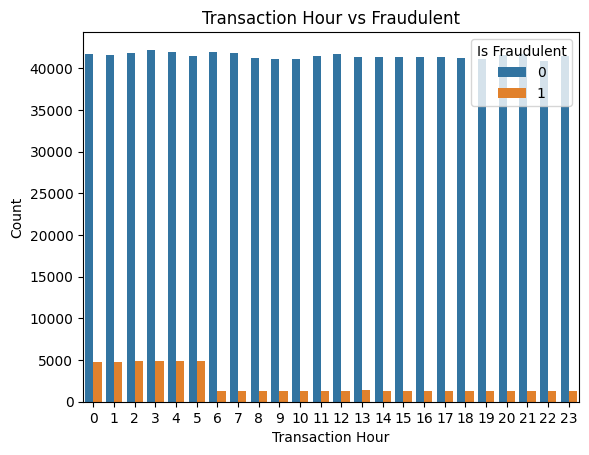

In [ ]:
sns.countplot(data=df, x="Transaction Hour", hue="Is Fraudulent")
plt.title("Transaction Hour vs Fraudulent")
plt.xlabel("Transaction Hour")
plt.ylabel("Count")
plt.show()

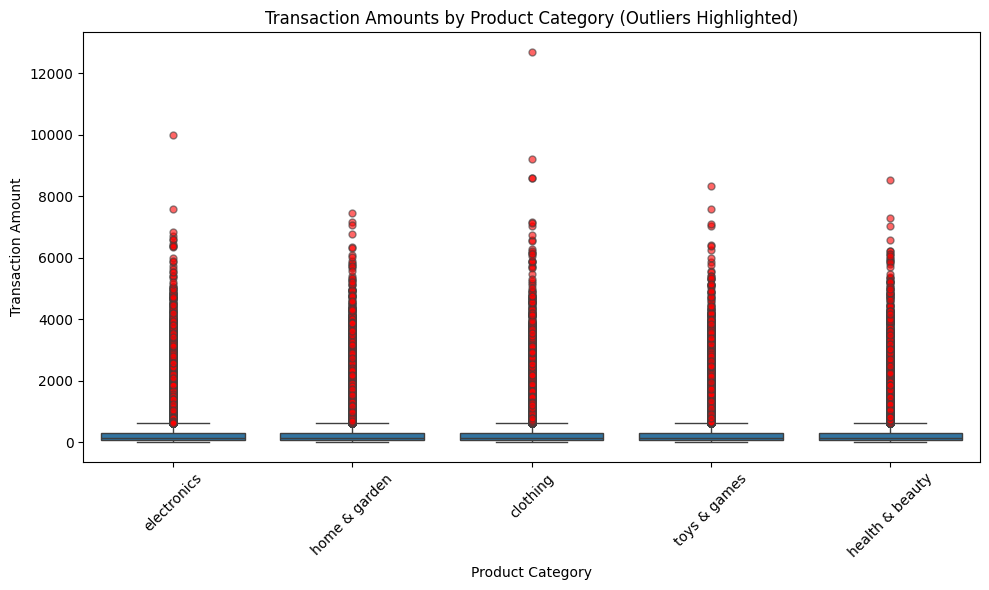

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Product Category", y="Transaction Amount", fliersize=5, flierprops=dict(marker='o', markerfacecolor='red', alpha=0.6))

plt.title("Transaction Amounts by Product Category (Outliers Highlighted)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-9-6e1188387dca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Product Category", y="Transaction Amount", palette="Set2", inner="quartile")


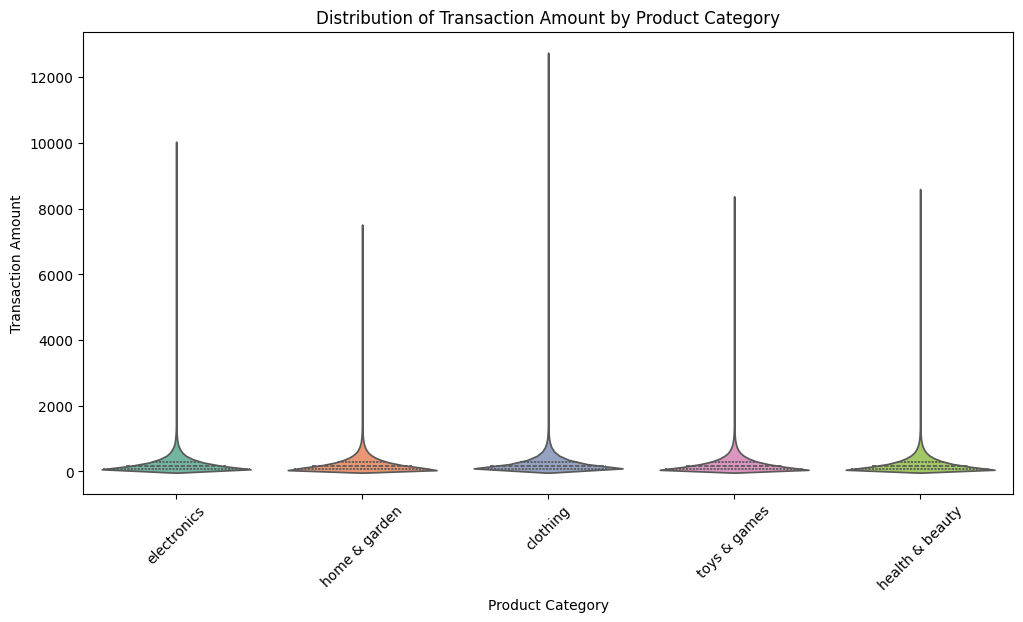

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x="Product Category", y="Transaction Amount", palette="Set2", inner="quartile")
plt.title("Distribution of Transaction Amount by Product Category")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1048575 non-null  object 
 1   Customer ID         1048575 non-null  object 
 2   Transaction Amount  1048575 non-null  float64
 3   Transaction Date    1048575 non-null  object 
 4   Payment Method      1048575 non-null  object 
 5   Product Category    1048575 non-null  object 
 6   Quantity            1048575 non-null  int64  
 7   Customer Age        1048575 non-null  int64  
 8   Customer Location   1048575 non-null  object 
 9   Device Used         1048575 non-null  object 
 10  IP Address          1048575 non-null  object 
 11  Shipping Address    1048575 non-null  object 
 12  Billing Address     1048575 non-null  object 
 13  Is Fraudulent       1048575 non-null  int64  
 14  Account Age Days    1048575 non-null  int64  
 15  Transaction Hou

In [ ]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.266852e+02,2.999163e+00,3.451965e+01,5.008702e-02,1.796550e+02,1.128953e+01
std,2.703840e+02,1.414625e+00,1.000142e+01,2.181246e-01,1.068629e+02,6.976679e+00
min,1.000000e+01,1.000000e+00,-1.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.856000e+01,2.000000e+00,2.800000e+01,0.000000e+00,8.600000e+01,5.000000e+00
50%,1.516100e+02,3.000000e+00,3.500000e+01,0.000000e+00,1.790000e+02,1.100000e+01
75%,2.958700e+02,4.000000e+00,4.100000e+01,0.000000e+00,2.720000e+02,1.700000e+01
max,1.270175e+04,5.000000e+00,8.600000e+01,1.000000e+00,3.650000e+02,2.300000e+01


In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Transaction Amount,0
Transaction Date,0
Payment Method,0
Product Category,0
Quantity,0
Customer Age,0
Customer Location,0
Device Used,0


In [ ]:
df.isna().sum()

,0
Transaction ID,0
Customer ID,0
Transaction Amount,0
Transaction Date,0
Payment Method,0
Product Category,0
Quantity,0
Customer Age,0
Customer Location,0
Device Used,0


In [ ]:
df = df.drop(
    columns=['Transaction ID', 'Customer ID', 'Customer Location','Transaction Date','IP Address', 'Shipping Address', 'Billing Address'],
    errors='ignore')
cat_columns=df.select_dtypes(include=['category','object']).columns
print("Categorical Columns are:",cat_columns.tolist())

Categorical Columns are: ['Payment Method', 'Product Category', 'Device Used']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.columns=df.columns.str.strip()
print(repr(df.columns))

Index(['Transaction Amount', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Device Used', 'Is Fraudulent', 'Account Age Days',
       'Transaction Hour'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.encode('ascii', 'ignore').str.decode('ascii')
for col in cat_columns:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

In [ ]:
x=df.drop('Is Fraudulent',axis=1)
y=df['Is Fraudulent']

In [ ]:
x.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Account Age Days,Transaction Hour
0,58.09,1,1,1,17,2,30,5
1,389.96,3,1,2,40,0,72,8
2,134.19,0,3,2,22,2,63,3
3,226.17,1,0,5,31,0,124,20
4,121.53,1,0,2,51,2,158,5


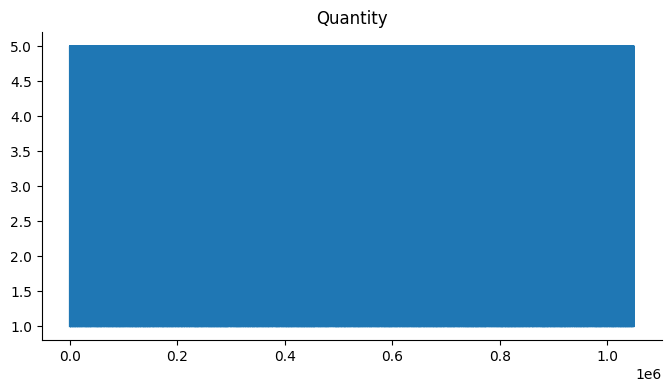

In [ ]:
from matplotlib import pyplot as plt
df['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"The shape of x_train is {x_train.shape}")
print(f"The shape of x_test is {x_test.shape}")
print(f"The shape of y_train is {y_train.shape}")
print(f"The shape of y_test is {y_test.shape}")


The shape of x_train is (838860, 8)
The shape of x_test is (209715, 8)
The shape of y_train is (838860,)
The shape of y_test is (209715,)


In [ ]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(32,activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1,activation='sigmoid')
                  ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
train = model.fit(x_train, y_train, epochs=7, batch_size=32, validation_data=(x_test, y_test))
model.save("fraud_detection_model.h5")



Epoch 1/7
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - accuracy: 0.9445 - loss: 0.3840 - val_accuracy: 0.9542 - val_loss: 0.1606
Epoch 2/7
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - accuracy: 0.9544 - loss: 0.1610 - val_accuracy: 0.9547 - val_loss: 0.1592
Epoch 3/7
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - accuracy: 0.9548 - loss: 0.1585 - val_accuracy: 0.9534 - val_loss: 0.1616
Epoch 4/7
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - accuracy: 0.9545 - loss: 0.1587 - val_accuracy: 0.9537 - val_loss: 0.1597
Epoch 5/7
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.9542 - loss: 0.1593 - val_accuracy: 0.9543 - val_loss: 0.1582
Epoch 6/7
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - accuracy: 0.9548 - loss: 0.1572 - val_accuracy: 0.9539 - val_loss: 0.1594
Epoch 7/7
26215/26215 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - accuracy: 0.9548 - loss: 0.1582 - val_accuracy: 0.9548 - val_loss: 0.1582


In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

6554/6554 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
Accuracy: 0.9548434780535489
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    199146
           1       0.86      0.12      0.22     10569

    accuracy                           0.95    209715
   macro avg       0.91      0.56      0.60    209715
weighted avg       0.95      0.95      0.94    209715



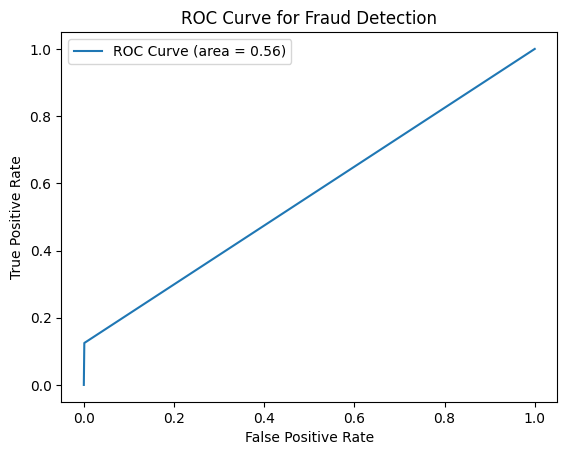

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fraud Detection')
plt.legend()
plt.show()


In [ ]:
# STEP 1: Install SHAP (if not already)

# STEP 2: Imports
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: disable warnings
import warnings
warnings.filterwarnings("ignore")
X=x
# For this demo, we’ll sample the data
X_sampled = X.sample(100)  # smaller sample speeds up SHAP

#SHAP Explainer
explainer = shap.Explainer(model.predict, X_sampled)  # for tree-based: shap.TreeExplainer()
shap_values = explainer(X_sampled)


723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
744/744 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
725/725 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


ExactExplainer explainer:   4%|▍         | 4/100 [00:00<?, ?it/s]

706/706 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:   6%|▌         | 6/100 [00:14<01:54,  1.22s/it]

742/742 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


ExactExplainer explainer:   7%|▋         | 7/100 [00:16<02:34,  1.67s/it]

719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:   8%|▊         | 8/100 [00:19<03:14,  2.11s/it]

729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:   9%|▉         | 9/100 [00:20<02:44,  1.81s/it]

730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  10%|█         | 10/100 [00:22<02:34,  1.72s/it]

711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  11%|█         | 11/100 [00:25<03:05,  2.08s/it]

743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  12%|█▏        | 12/100 [00:28<03:22,  2.30s/it]

737/737 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  13%|█▎        | 13/100 [00:29<02:52,  1.98s/it]

701/701 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  14%|█▍        | 14/100 [00:30<02:36,  1.82s/it]

737/737 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  15%|█▌        | 15/100 [00:32<02:25,  1.71s/it]

728/728 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  16%|█▌        | 16/100 [00:33<02:12,  1.58s/it]

725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  17%|█▋        | 17/100 [00:34<02:02,  1.48s/it]

720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  18%|█▊        | 18/100 [00:36<01:58,  1.44s/it]

720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  19%|█▉        | 19/100 [00:39<02:31,  1.87s/it]

743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  20%|██        | 20/100 [00:40<02:17,  1.72s/it]

724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  21%|██        | 21/100 [00:41<02:04,  1.58s/it]

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  22%|██▏       | 22/100 [00:42<01:55,  1.48s/it]

729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  23%|██▎       | 23/100 [00:44<01:55,  1.50s/it]

741/741 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  24%|██▍       | 24/100 [00:45<01:52,  1.48s/it]

730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  25%|██▌       | 25/100 [00:47<01:52,  1.50s/it]

719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  26%|██▌       | 26/100 [00:48<01:45,  1.42s/it]

727/727 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  27%|██▋       | 27/100 [00:50<01:45,  1.45s/it]

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  28%|██▊       | 28/100 [00:53<02:15,  1.88s/it]

727/727 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  29%|██▉       | 29/100 [00:55<02:27,  2.07s/it]

751/751 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  30%|███       | 30/100 [00:58<02:42,  2.32s/it]

733/733 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  31%|███       | 31/100 [01:00<02:23,  2.08s/it]

725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  32%|███▏      | 32/100 [01:01<02:09,  1.90s/it]

735/735 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  33%|███▎      | 33/100 [01:02<01:56,  1.74s/it]

728/728 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  34%|███▍      | 34/100 [01:04<01:53,  1.73s/it]

744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  35%|███▌      | 35/100 [01:07<02:12,  2.04s/it]

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  36%|███▌      | 36/100 [01:08<01:59,  1.87s/it]

720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  37%|███▋      | 37/100 [01:10<01:50,  1.75s/it]

702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  38%|███▊      | 38/100 [01:11<01:43,  1.66s/it]

730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  39%|███▉      | 39/100 [01:13<01:37,  1.60s/it]

729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  40%|████      | 40/100 [01:14<01:33,  1.56s/it]

720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  41%|████      | 41/100 [01:15<01:26,  1.46s/it]

739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  42%|████▏     | 42/100 [01:17<01:25,  1.47s/it]

734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  43%|████▎     | 43/100 [01:20<01:45,  1.86s/it]

726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  44%|████▍     | 44/100 [01:21<01:33,  1.67s/it]

720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  45%|████▌     | 45/100 [01:22<01:24,  1.54s/it]

727/727 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  46%|████▌     | 46/100 [01:24<01:21,  1.52s/it]

737/737 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  47%|████▋     | 47/100 [01:25<01:19,  1.50s/it]

739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  48%|████▊     | 48/100 [01:26<01:14,  1.44s/it]

745/745 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  49%|████▉     | 49/100 [01:28<01:13,  1.45s/it]

733/733 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  50%|█████     | 50/100 [01:29<01:12,  1.45s/it]

718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  51%|█████     | 51/100 [01:32<01:31,  1.87s/it]

709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  52%|█████▏    | 52/100 [01:34<01:24,  1.76s/it]

723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  53%|█████▎    | 53/100 [01:35<01:15,  1.60s/it]

724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  54%|█████▍    | 54/100 [01:36<01:11,  1.56s/it]

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  55%|█████▌    | 55/100 [01:38<01:08,  1.53s/it]

726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  56%|█████▌    | 56/100 [01:39<01:06,  1.51s/it]

743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  57%|█████▋    | 57/100 [01:41<01:02,  1.44s/it]

746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  58%|█████▊    | 58/100 [01:42<00:58,  1.40s/it]

725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ExactExplainer explainer:  59%|█████▉    | 59/100 [01:43<00:58,  1.43s/it]

739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  60%|██████    | 60/100 [01:46<01:13,  1.83s/it]

727/727 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  61%|██████    | 61/100 [01:48<01:07,  1.72s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  62%|██████▏   | 62/100 [01:49<01:06,  1.74s/it]

720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  63%|██████▎   | 63/100 [01:51<01:01,  1.65s/it]

723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  64%|██████▍   | 64/100 [01:52<00:55,  1.54s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  65%|██████▌   | 65/100 [01:54<00:52,  1.51s/it]

719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  66%|██████▌   | 66/100 [01:55<00:50,  1.50s/it]

728/728 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  67%|██████▋   | 67/100 [01:57<00:50,  1.52s/it]

720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  68%|██████▊   | 68/100 [01:59<01:00,  1.90s/it]

741/741 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  69%|██████▉   | 69/100 [02:01<00:55,  1.79s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  70%|███████   | 70/100 [02:02<00:50,  1.69s/it]

744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  71%|███████   | 71/100 [02:04<00:47,  1.65s/it]

737/737 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  72%|███████▏  | 72/100 [02:05<00:45,  1.62s/it]

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  73%|███████▎  | 73/100 [02:07<00:41,  1.52s/it]

732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  74%|███████▍  | 74/100 [02:08<00:37,  1.45s/it]

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  75%|███████▌  | 75/100 [02:09<00:36,  1.45s/it]

700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  76%|███████▌  | 76/100 [02:11<00:37,  1.57s/it]

727/727 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  77%|███████▋  | 77/100 [02:13<00:38,  1.66s/it]

739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  78%|███████▊  | 78/100 [02:15<00:35,  1.62s/it]

702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  79%|███████▉  | 79/100 [02:16<00:33,  1.57s/it]

743/743 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  80%|████████  | 80/100 [02:18<00:30,  1.54s/it]

734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  81%|████████  | 81/100 [02:19<00:27,  1.47s/it]

735/735 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  82%|████████▏ | 82/100 [02:20<00:26,  1.47s/it]

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  83%|████████▎ | 83/100 [02:22<00:24,  1.47s/it]

742/742 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  84%|████████▍ | 84/100 [02:23<00:23,  1.46s/it]

742/742 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  85%|████████▌ | 85/100 [02:26<00:28,  1.88s/it]

746/746 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  86%|████████▌ | 86/100 [02:28<00:24,  1.73s/it]

729/729 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  87%|████████▋ | 87/100 [02:29<00:20,  1.61s/it]

726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  88%|████████▊ | 88/100 [02:30<00:18,  1.57s/it]

724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  89%|████████▉ | 89/100 [02:32<00:16,  1.50s/it]

744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  90%|█████████ | 90/100 [02:33<00:15,  1.51s/it]

732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  91%|█████████ | 91/100 [02:35<00:13,  1.52s/it]

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  92%|█████████▏| 92/100 [02:36<00:12,  1.53s/it]

744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  93%|█████████▎| 93/100 [02:39<00:13,  1.93s/it]

732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  94%|█████████▍| 94/100 [02:41<00:10,  1.80s/it]

722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  95%|█████████▌| 95/100 [02:42<00:08,  1.66s/it]

741/741 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  96%|█████████▌| 96/100 [02:44<00:06,  1.62s/it]

754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  97%|█████████▋| 97/100 [02:45<00:04,  1.53s/it]

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  98%|█████████▊| 98/100 [02:46<00:02,  1.48s/it]

719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  99%|█████████▉| 99/100 [02:48<00:01,  1.48s/it]

722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer: 100%|██████████| 100/100 [02:49<00:00,  1.50s/it]

711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer: 101it [02:52,  1.78s/it]


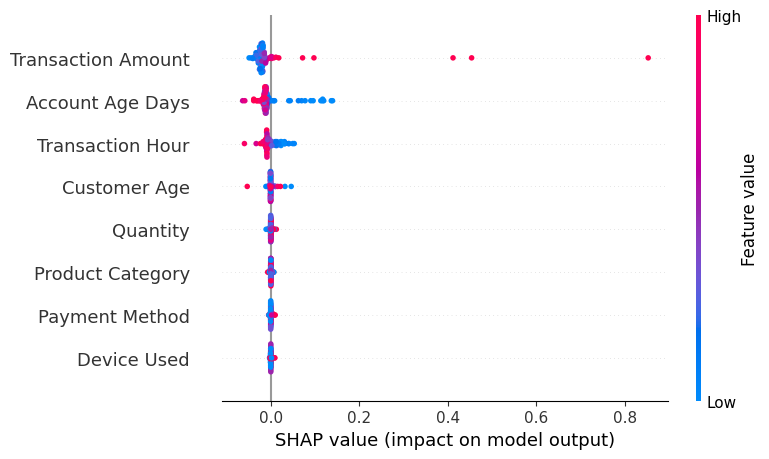

In [ ]:

#  SHAP Summary Plot (shows feature importance & impact)
shap.summary_plot(shap_values, X_sampled)



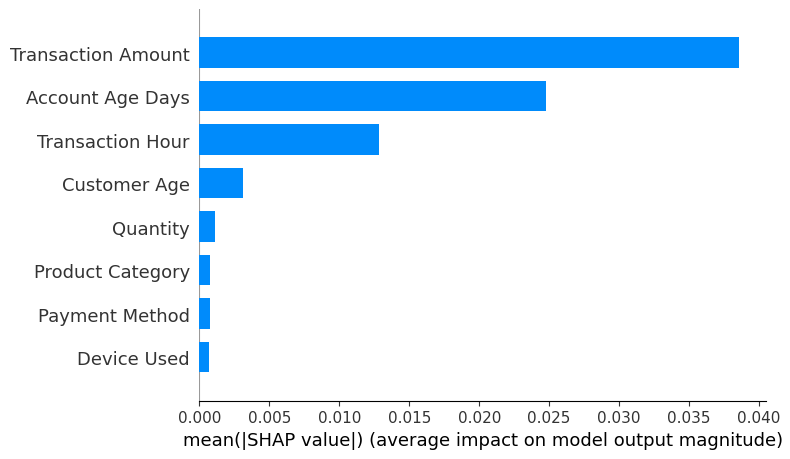

In [ ]:
# SHAP bar chart version
shap.summary_plot(shap_values, X_sampled, plot_type="bar")


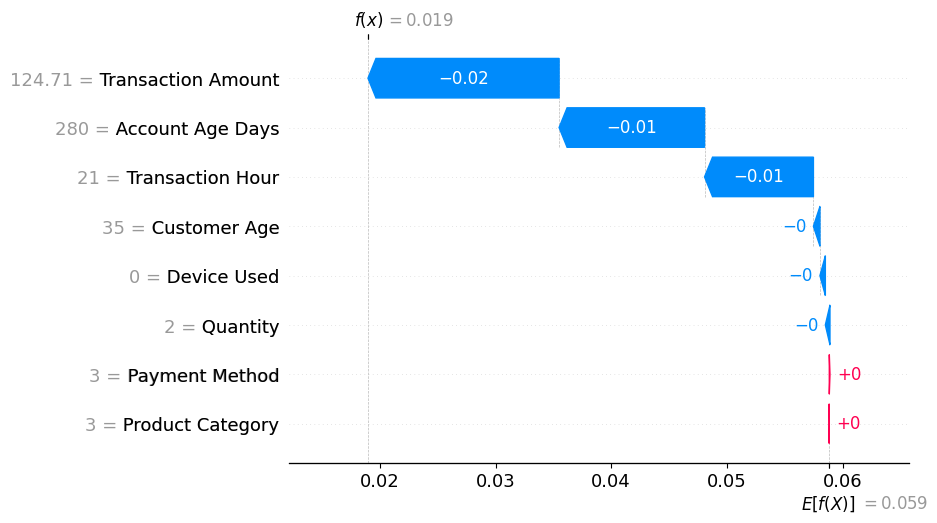

In [ ]:
#Explain a single prediction
shap.plots.waterfall(shap_values[0])